# 데이터 전처리 및 증강

- 크롭, 반전, 회전 등의 효과를 입혀 증강효과를 얻음

*자동차 특성상 위아래 반전한 사진은 고려 하지 않도록 함*

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# GPU 디바이스 세부 정보 출력
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print(gpu)
        
# GPU 사용 여부 확인
if tf.config.list_physical_devices('GPU'):
    print("CUDA")
else:
    print("NOT CUDA")


2.10.0
Num GPUs Available:  1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
CUDA


In [ ]:
# 이미지 증강 설정
datagen = ImageDataGenerator(
    rescale=1.0/255,  # 이미지 값을 0-1 사이로 스케일 조정
    rotation_range=20,  # 랜덤하게 20도까지 회전
    width_shift_range=0.2,  # 랜덤하게 가로로 20% 이동
    height_shift_range=0.2,  # 랜덤하게 세로로 20% 이동
    shear_range=0.15,  # 랜덤하게 시어 변환
    zoom_range=0.2,  # 랜덤하게 줌 변환
    horizontal_flip=True,  # 랜덤하게 좌우 반전
    fill_mode='nearest'  # 변환 후 비어 있는 공간을 채우는 방법
)

# 데이터셋 디렉토리 설정
train_data_dir = '../Dataset/Train'
batch_size = 200
img_height = 32
img_width = 32

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# 전처리된 이미지 데이터 확인
for batch, labels in train_generator:
    print(f"배치 크기: {batch.shape}")
    print(f"레이블: {labels}")
    break  # 첫 번째 배치만 출력


Found 405919 images belonging to 8 classes.
배치 크기: (200, 32, 32, 3)
레이블: [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


|함수|설명|
|---|---|
|rescale | 픽셀의 값을 줄이거나 늘릴 수 있다. 보통 0~1 사이의 값을 주기 위해 1/255를 많이 사용한다.|
|wide_shift_range | 주어진 값이 1보다 작을 경우 전체 너비에 대한 비율로 적용되며 이 범위에 대한 이동 범위만큼 좌우로 이미지를 움직인다. 예를 들어 너비가 100픽셀인 경우 0.1이 주어지면 10픽셀만큼의 범위 내에서 임의로 좌우로 움직인 이미지가 제공된다.|
|height_shift_range | 주어진 값이 1보다 작을 경우 전체 높이에 대한 비율로 적용되며 이 범위에 대한 이동범위만큼 임의로 상하로 이미지를 움직인다. 예를들어 높이가 100픽셀인경우 0.1이 주어지면 10픽셀만큼의 범위내에서 임의로 상하로 움직인 이미지가 제공된다.|
|rotation_range | 주어진 각도만큼의 범위 내에서 임의로 회전시킨 이미지가 주어진다.예를 들어, 90이 주어지면 0~90 도만큼의 임의의 회전을 한 이미지가 제공된다.|
|zoom_range | 주어진 숫자만큼의 범위 내 배율을 적용한 이미지를 제공한다.예를 들어, 0.2인 경우 0.8~1.2 비율의 이미지가 임의로 제공된다.|
|validation_split | validation_set으로 쓸 데이터의 비율을 정한다.  만약 값이 정해져 있다면 후에 사용할 flow_from_directory나 flow_from_dataframe에서 파라미터 subset = 'training' 혹은 subset = 'validation'으로 훈련 데이터 셋과 검증 데이터 셋을 줄 수 있다.|
|horizontal_flip | True 인경우, 수평방향 뒤집기를 한 이미지를 제공한다. (좌우 뒤집기)|
|vertical_flip | True 인 경우, 수직방향 뒤집기를 한 이미지를 제공한다. (상하 뒤집기)|
|fill_mode | 이미지를 변경했을 때, 비어있는 픽셀이 생길 경우, 어떻게 채울 지에 관한 설정이다. neareast, constant, reflect, wrap 등이 있다. |

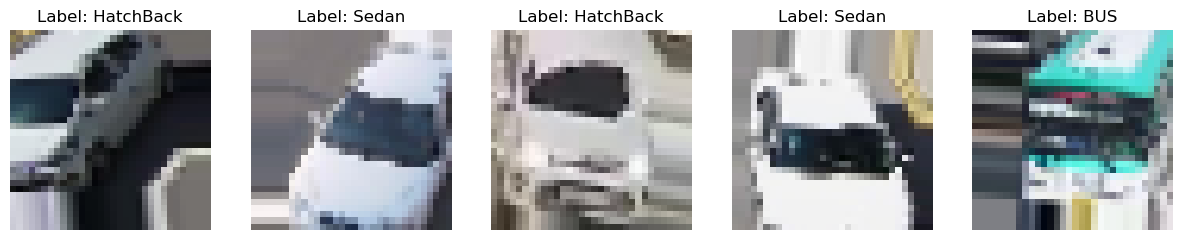

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 시각화 함수
def visualize_batch(batch, labels, class_indices, num_images=5):
    # 클래스 인덱스를 클래스 이름으로 역변환
    class_names = {v: k for k, v in class_indices.items()}

    plt.figure(figsize=(15, 10))  # 그림 크기 설정
    for i in range(min(num_images, batch.shape[0])):  # 배치 크기만큼 반복
        plt.subplot(1, num_images, i+1)  # 1행 num_images 열로 서브플롯 생성
        plt.imshow(batch[i])  # i번째 이미지 출력
        plt.axis('off')  # 축 제거
        class_idx = np.argmax(labels[i])  # 원-핫 인코딩된 레이블에서 최대값을 인덱스로 사용
        plt.title(f"Label: {class_names[class_idx]}")  # 클래스 이름 출력  
    plt.savefig('../Image/1.Preprocessing/Preprocessing.png')
    plt.show()
  

# 전처리된 이미지 데이터 시각화
for batch, labels in train_generator:
    visualize_batch(batch, labels, train_generator.class_indices, num_images=5)  # 첫 5개 이미지 시각화
    break  # 첫 번째 배치만 시각화


